In [ ]:
# Install necessary packages
!pip install pandas scikit-learn xgboost
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb


In [ ]:
# Load the data
url = '/content/sample_data/Filtered_Phenotypic_Data.csv'  # Replace with your file path or URL
data = pd.read_csv(url)
# Display the first few rows of the dataset
print(data.head())



   SUB_ID       FILE_ID  AGE_AT_SCAN  DX_GROUP  anat_cnr  anat_efc  anat_fber  \
0   50004  Pitt_0050004        19.09         1  7.698144  1.226218   9.725750   
1   50005  Pitt_0050005        13.73         1  9.071807  1.256278  11.198226   
2   50006  Pitt_0050006        13.37         1  8.026798  1.407166   6.282055   
3   50007  Pitt_0050007        17.78         1  5.775897  1.161231   6.991093   
4   50008  Pitt_0050008        32.45         1  6.669686  1.241491   7.945937   

   anat_fwhm  anat_qi1   anat_snr  func_efc  func_fber  func_fwhm  func_dvars  \
0   3.881684  0.174186   9.323463  0.578960  63.317943   1.866104    1.180605   
1   3.628667  0.119269  10.814200  0.556064  70.800354   1.918278    1.092030   
2   3.674539  0.130647  10.123574  0.562942  75.364679   2.213873    1.086830   
3   4.104707  0.236214   7.638746  0.607554  64.682109   1.834521    1.099380   
4   3.831462  0.131733   8.507972  0.571447  60.682083   1.909622    1.038369   

   func_outlier  func_qual

In [ ]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

    # Check unique values in 'DX_GROUP' before splitting
print(data['DX_GROUP'].unique())
# Separate features and target
X = data.drop(columns=['DX_GROUP'])  # Features
y = data['DX_GROUP']  # Target



[1 2]


In [ ]:
# Separate features and target
X = data.drop(columns=['DX_GROUP'])  # Features
y = data['DX_GROUP']  # Target
# If necessary, adjust 'DX_GROUP' to be 0 and 1
if y.min() == 1:
    y = y - 1
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predict on the test set
y_pred = xgb_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')



Accuracy: 0.8757062146892656
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        84
           1       0.89      0.87      0.88        93

    accuracy                           0.88       177
   macro avg       0.88      0.88      0.88       177
weighted avg       0.88      0.88      0.88       177



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Check unique values in 'DX_GROUP' before splitting
print(data['DX_GROUP'].unique())

# Separate features and target
X = data.drop(columns=['DX_GROUP'])  # Features
y = data['DX_GROUP']  # Target

# If necessary, adjust 'DX_GROUP' to be 0 and 1
if y.min() == 1:
    y = y - 1

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[1 2]


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

# Generate classification report
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')


Accuracy: 0.8757062146892656
Precision: 0.8760411838850941
Recall: 0.8757062146892656
F1-score: 0.8757618449000822
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        84
           1       0.89      0.87      0.88        93

    accuracy                           0.88       177
   macro avg       0.88      0.88      0.88       177
weighted avg       0.88      0.88      0.88       177



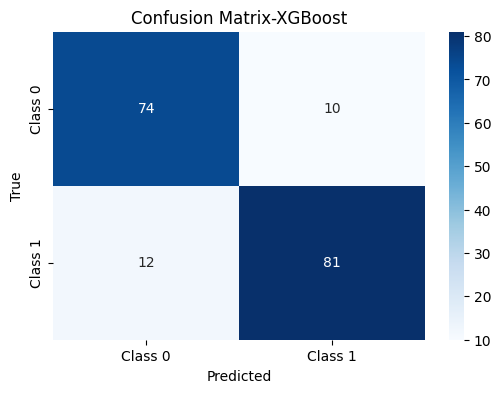

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix-XGBoost')
plt.show()

[0]	validation_0-logloss:0.56663	validation_0-error:0.18812	validation_1-logloss:0.62340	validation_1-error:0.31073


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-logloss:0.48784	validation_0-error:0.15559	validation_1-logloss:0.55206	validation_1-error:0.23729
[2]	validation_0-logloss:0.41830	validation_0-error:0.09194	validation_1-logloss:0.50990	validation_1-error:0.17514
[3]	validation_0-logloss:0.37410	validation_0-error:0.07072	validation_1-logloss:0.47397	validation_1-error:0.14124
[4]	validation_0-logloss:0.33892	validation_0-error:0.06223	validation_1-logloss:0.46469	validation_1-error:0.17514
[5]	validation_0-logloss:0.32199	validation_0-error:0.05658	validation_1-logloss:0.45467	validation_1-error:0.16949
[6]	validation_0-logloss:0.29256	validation_0-error:0.05233	validation_1-logloss:0.41981	validation_1-error:0.15254
[7]	validation_0-logloss:0.27121	validation_0-error:0.04385	validation_1-logloss:0.39062	validation_1-error:0.13559
[8]	validation_0-logloss:0.24599	validation_0-error:0.03395	validation_1-logloss:0.37225	validation_1-error:0.13559
[9]	validation_0-logloss:0.23912	validation_0-error:0.03253	validation_1

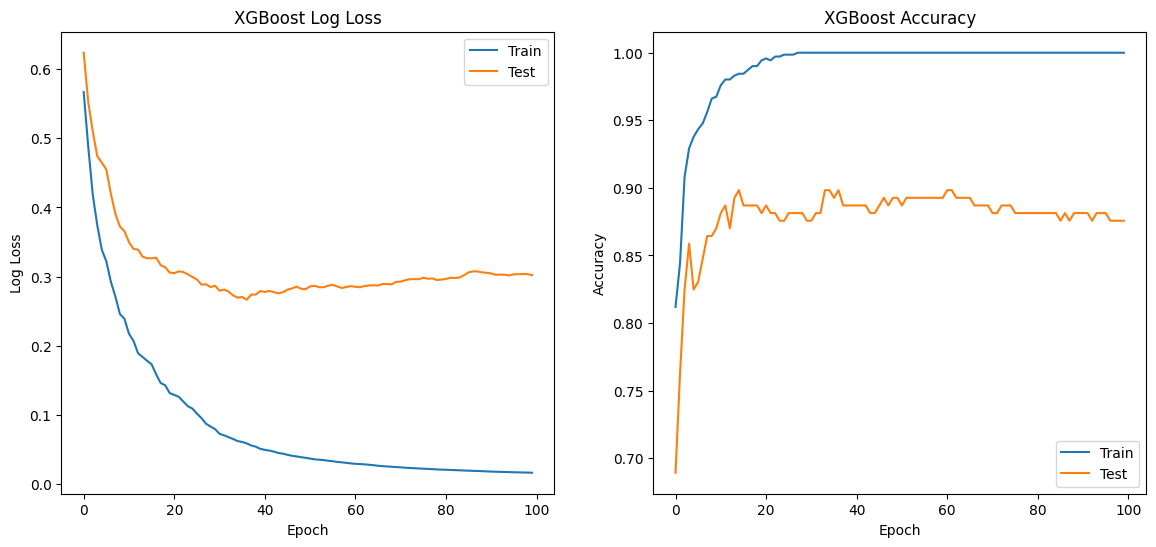

In [ ]:
import numpy as np
# Train the XGBoost model with evaluation sets
xgb_model = xgb.XGBClassifier()  # Or keep your existing model
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
              eval_metric=['logloss', 'error'], verbose=True)  # Track 'error'

# Now you can plot the results
results = xgb_model.evals_result()
# Plot training and validation log loss
results = xgb_model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(14, 6))

# Log Loss plot
plt.subplot(1, 2, 1)
plt.plot(x_axis, results['validation_0']['logloss'], label='Train')
plt.plot(x_axis, results['validation_1']['logloss'], label='Test')
plt.title('XGBoost Log Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(x_axis, 1 - np.array(results['validation_0']['error']), label='Train')
plt.plot(x_axis, 1 - np.array(results['validation_1']['error']), label='Test')
plt.title('XGBoost Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
